# Machine Learning Classification

Hi Saya Suwarti.. Disini saya akan coba sedikit sharing2 tentang Machine Learning Classification..

Import library-library yg akan diperlukan..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load data

In [2]:
def get_xor():
    X = np.zeros((200, 2))
    X[:50] = np.random.random((50, 2)) / 2 + 0.5 # (0.5-1, 0.5-1)
    X[50:100] = np.random.random((50, 2)) / 2 # (0-0.5, 0-0.5)
    X[100:150] = np.random.random((50, 2)) / 2 + np.array([[0, 0.5]]) # (0-0.5, 0.5-1)
    X[150:] = np.random.random((50, 2)) / 2 + np.array([[0.5, 0]]) # (0.5-1, 0-0.5)
    Y = np.array([0]*100 + [1]*100)
    return X, Y

def get_donut():
    N = 200
    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    return X, Y

def create_data():
    width = 8
    height = 8
    N = width * height
    X = np.zeros((N, 2))
    y = np.zeros(N)
    n = 0
    start_t = 0
    for i in range(width):
        t = start_t
        for j in range(height):
            X[n] = [i, j]
            y[n] = t
            n += 1
            t = (t + 1) % 2
        start_t = (t + 1) % 2
    return X, y

In [3]:
X, y = get_xor()

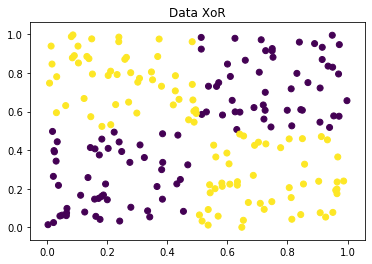

In [4]:
plt.scatter(X[:,0],X[:,1],c=y);
plt.title("Data XoR");

# K-Nearest Neighbours

Disini X test yg digunakan sama dengan X train, sehingga menghasilkan accuracy yg bagus..

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:
pred = model.predict(X)

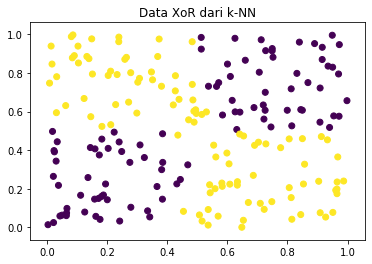

In [7]:
plt.scatter(X[:,0],X[:,1],c=pred);
plt.title("Data XoR dari k-NN");

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       100
           1       0.96      1.00      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



Dalam ide Machine Learning, X test itu berbeda dari X train nya.. Maka kita akan split dataset nya..

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

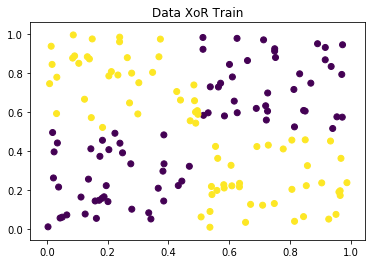

In [10]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train);
plt.title("Data XoR Train");

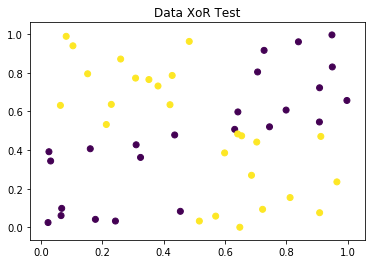

In [11]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test);
plt.title("Data XoR Test");

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
pred = model.predict(X_test)

In [14]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.92      0.92      0.92        26

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



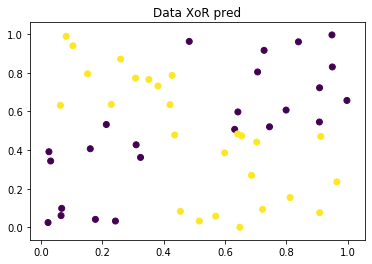

In [15]:
plt.scatter(X_test[:,0],X_test[:,1],c=pred);
plt.title("Data XoR pred");

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
pred_lr = model.predict(X_test)

In [18]:
print(classification_report(pred_lr, y_test))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46        28
           1       0.38      0.45      0.42        22

    accuracy                           0.44        50
   macro avg       0.44      0.44      0.44        50
weighted avg       0.45      0.44      0.44        50



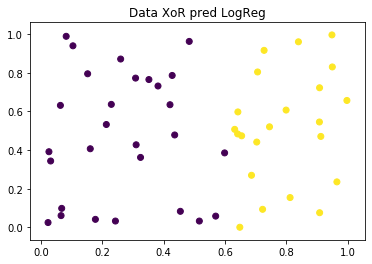

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=pred_lr);
plt.title("Data XoR pred LogReg");

Hasil dari model Logistic Regression ini memberikan accuracy yg kurang bagus..

Tetapi bukan berarti model Logistic Regression ini jelek..

Namun bergantung pada tipe dataset yg digunkan..

Dataset yg digunakan disini adalah data xor dimana data xor itu tidak linearly separable..

Sementara itu, model Logistic Regression itu sendiri memberikan hasil yg baik untuk tipe dataset yg linearly separable..

Dataset lineary spereable adalah dataset yg class data nya bisa dipisahkan oleh suatu garis..

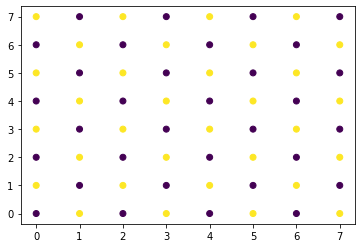

In [20]:
#K-NN gagal ketika 

X,y = create_data()

plt.scatter(X[:,0], X[:,1], c=y);

In [21]:
model = KNeighborsClassifier()
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
pred = model.predict(X)

In [23]:
print(classification_report(pred,y))

              precision    recall  f1-score   support

         0.0       0.06      0.06      0.06        32
         1.0       0.06      0.06      0.06        32

    accuracy                           0.06        64
   macro avg       0.06      0.06      0.06        64
weighted avg       0.06      0.06      0.06        64



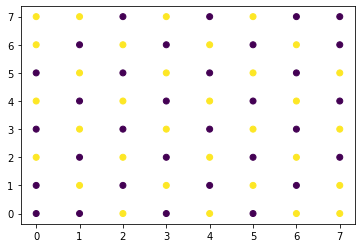

In [24]:
plt.scatter(X[:,0], X[:,1], c=pred);

# Support Vector Machines (SVM)

In [25]:
from sklearn.svm import SVC, LinearSVC

In [26]:
lin_svc = LinearSVC()
rbf_svc = SVC(kernel='rbf', gamma=10, C=0.1)

In [27]:
rbf_svc.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
lin_svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [29]:
pred_lin = lin_svc.predict(X_test)
pred_rbf = rbf_svc.predict(X_test)

In [30]:
print(classification_report(pred_lin,y_test))

              precision    recall  f1-score   support

           0       0.50      0.44      0.47        27
           1       0.42      0.48      0.45        23

    accuracy                           0.46        50
   macro avg       0.46      0.46      0.46        50
weighted avg       0.46      0.46      0.46        50



In [31]:
print(classification_report(pred_rbf,y_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.92      0.92      0.92        26

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



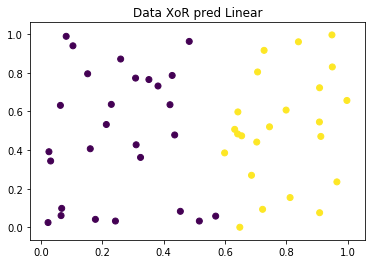

In [32]:
plt.scatter(X_test[:,0],X_test[:,1],c=pred_lin);
plt.title("Data XoR pred Linear");

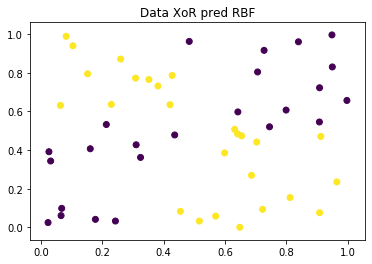

In [33]:
plt.scatter(X_test[:,0],X_test[:,1],c=pred_rbf);
plt.title("Data XoR pred RBF");

# Decision Tree and Random Forest

Random forest itu mengubah weak classifiers menjadi good classifiers

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Decision Tree

In [35]:
#untuk turning2 parameter nya, bisa liat di dokumentasi scikit learn

dt = DecisionTreeClassifier(max_depth=10)

In [36]:
dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)

In [37]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.96      0.92      0.94        26

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [38]:
#kita coba ubah2 parameter nya

dt = DecisionTreeClassifier(max_depth=100)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.96      0.92      0.94        26

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [39]:
#kita coba ubah2 parameter nya

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.70      0.29      0.41        24
           1       0.57      0.88      0.70        26

    accuracy                           0.60        50
   macro avg       0.64      0.59      0.55        50
weighted avg       0.63      0.60      0.56        50



# Random Forest

In [40]:
rf = RandomForestClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.70      0.29      0.41        24
           1       0.57      0.88      0.70        26

    accuracy                           0.60        50
   macro avg       0.64      0.59      0.55        50
weighted avg       0.63      0.60      0.56        50



# Sekian

Sekian dulu sharing2 kali ini, terima kasih..